### "Effect of an autapse on the firing pattern transition in a bursting neuron"

Work on replicating the results of this paper (Wang et al. 2014) using the izhikevich neuron (instead of HR). The specific subtype of neuron needs to be decided but maybe the IB neuron is a good candidate. 

This paper specifically looks at the effects of the autaptic variables (f and tau) on the bifurcation diagram at different injected currents.

fig. 1: shows the bifurcation diagram for the baseline neuron (no autapse). Plot ISI vs external current.

fig. 6: The parameter plane plot showing the information entropy of spike trains for different values of f and tau. Higher information entropy = more chaotic/unpredictable spike train. Low information entropy = perfectly regular spiking.

fig. 8 and 10: Bifurcation diagrams of ISI for different tau values. Each plot also represents a set I_ext and f.

Also may want to include representative spike trains and bursting patterns.

In [1]:
import sys
sys.path.append("..\\") # parent directory
from AQUA_class import AQUA
from plotting_functions import *

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import entropy
from scipy.ndimage import gaussian_filter

import seaborn as sns
sns.set_theme(style = "white")

To start, we define an IB neuron and generate the bifurcation diagram.

This is done by injecting a fixed current and recording the steady-state ISI(s) and plotting these against each other.

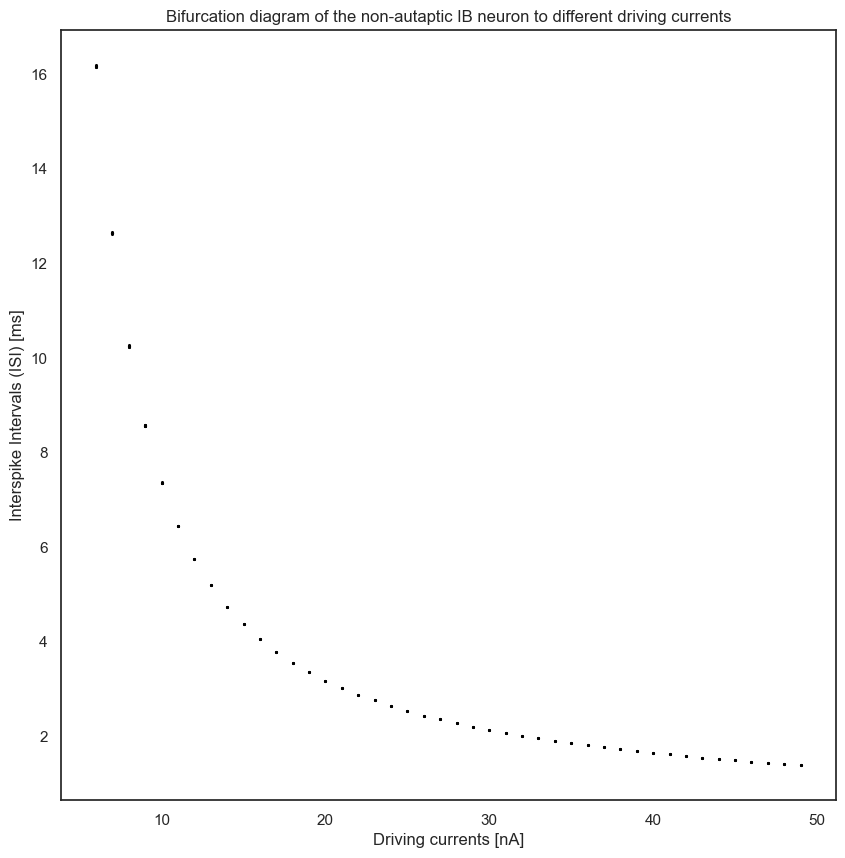

In [ ]:
# Bifurcation diagram without autapse
# Different neurons will have different bifurcation diagrams. 
# Neurons are probably also defined by their early behaviour.

# running the code below with a current step of 0.1 would take ~75 mins


# Will use the IB neuron of the izhikevich model
name = 'FS'
a = 0.1
b = 0.2
c = -65
d = 2

# Define the neuron
neuron = AQUA(a, b, c, d)

# Injected current values
dI = 1 #0.1 
I_vals = np.arange(6, 50, dI)

#Initial values to re-initialise neuron
x_start = np.array([c, 0, 0])
t_start = np.array([0])

# simulation parameters
T = 2500      # ms
dt = 0.01     # ms
N_iter = int(T/dt)

#define fig and ax
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# data array for the data frame
data_array = np.zeros((1, 3))

for i in I_vals:
    I_inj = i*np.ones(N_iter) # constant current

    neuron.Initialise(x_start, t_start)

    X, T, spike_times = neuron.update_RK2(dt, N_iter, I_inj)

    #Only get the steady state ISI (last 20% of spikes)
    ISI = np.ediff1d(spike_times[-int(0.2*len(spike_times)):])
    isi_vals, isi_counts = np.unique(np.unique(ISI, decimals = 6), return_counts = True)
    ax.scatter(i*np.ones(len(isi_vals)), isi_vals, c = 'black', s = 1.5, marker = "o")

    for j in range(len(isi_vals)):
        df_row = np.array([i, isi_vals[j], isi_counts[j]])
        data_array = np.vstack((data_array, df_row))

cols = ['I_ext', 'ISI_values', 'ISI_counts']
df = pd.DataFrame(data = data_array, columns = cols)

plt.title("Bifurcation diagram of the non-autaptic IB neuron to different driving currents")
plt.ylabel("Interspike Intervals (ISI) [ms]")
plt.xlabel("Driving currents [nA]")
plt.savefig(f"non_autaptic_bifurcation_{name}_HD.png")


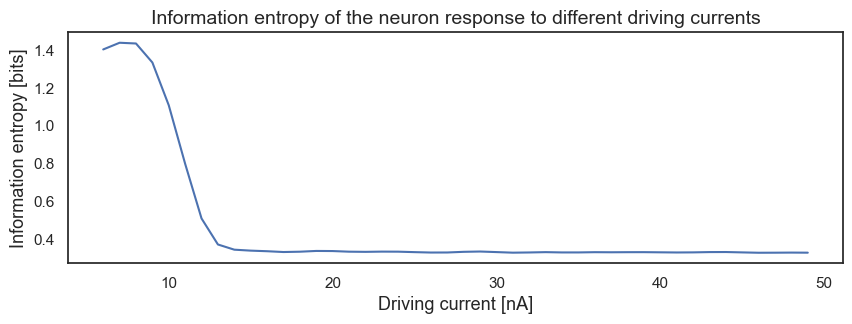

In [3]:
# See the information contained in the ISI distributions for fixed injected currents
H_isi = np.zeros(len(I_vals))

for n, i in enumerate(I_vals):
    counts = df[df['I_ext'] == i]['ISI_counts'].to_numpy()
    probs = counts/np.sum(counts)
    H_isi[n] = entropy(probs)

H_isi = gaussian_filter(H_isi, sigma = 1.0)

fig2, ax2 = plt.subplots(figsize = (10, 3))
plt.plot(I_vals, H_isi, c = 'b')
plt.title("Information entropy of the neuron response to different driving currents", fontsize = 14)
plt.ylabel("Information entropy [bits]", fontsize = 13)
plt.xlabel("Driving current [nA]", fontsize = 13)
plt.savefig(f"non_autaptic_information_{name}.png")